In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'svg' 
%matplotlib inline


from jupyterthemes import jtplot
jtplot.style(figsize=(9.0, 6.0))

import warnings
warnings.simplefilter('ignore')

Проектная работа по модулю “Построение моделей”

В данной работе предлагается решить задачу бинарной классификации на большом признаковом множестве
для датасета банка Santader (https://www.santanderbank.com/us/personal)
1. Загрузить данные
2. Провести описательный анализ предложенных данных
3. Провести анализ корреляции переменных, отобразить взаимосвязи между переменными
4. Провести стратегию Feature Selection (попробовать как минимум два различных подхода)
5. Шкалировать данные несколькими способами (нормализация, стандартизация). Какой подход лучше?
6. Попробовать стратегию oversamling и сравнить ее с неизмененной моделью
7. Попробовать стратегию undersampling и сравнить ее с неизмененной моделью
8. Сделать кросс-валидацию тренировочных данных с использованием подхода K-fold (n_folds=10)
9. Решить задачу бинарной классификации и предсказать удовлетворение клиентов банка (переменная TARGE) 
10. Рассчитать Feature Importances для переменных модели
11. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Rec 
12. Построить Confusion Matrix для ваших результатов
13. Загрузить ipython notebook с результатами работы на github репозиторий

## Реализация

*для удобства проверки я разделил работу на несколько частей

### Часть I (задания с 1 по 7)

- Загрузить данные
- Провести описательный анализ предложенных данных
- Провести анализ корреляции переменных, отобразить взаимосвязи между переменными
- Провести стратегию Feature Selection (попробовать как минимум два различных подхода)
- Шкалировать данные несколькими способами (нормализация, стандартизация). Какой подход лучше?
- Попробовать стратегию oversamling и сравнить ее с неизмененной моделью
- Попробовать стратегию undersampling и сравнить ее с неизмененной моделью

### Загрузим данные

In [3]:
train = pd.read_csv('train.csv')
train_m = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### EDA и Feature selection 
*поскольку признаков аж целых 371, и работа с фичами и EDA постоянно будут пересекаться и чтобы не делать тонну ненужных рисунков для упрощения я обьеденил данные пункты задания в один суб-блок  

#### Выполним описательный анализ данных в нашем наборе данных

сначала посмотрим на соотношение нашего таргета (данная информация нам понадобится для дальнейшего выбора стратегии семплинга)

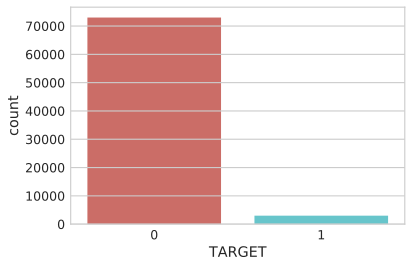

In [4]:
#построим countplot
sns.countplot(x='TARGET', data=train, palette='hls')

явный дисбаланс классов

In [5]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [6]:
train['TARGET'].value_counts(normalize=True)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

С одной стороны у банка дела идут неплохо и недовольных клиентов около 4% процентов, но вот такое смещение в таргете к одному ярко выраженному мажоритарному классу может в будущем повлиять на обобщающую способность нашей модели (при этом мне кажется что стратегия семплинга - oversampling не очень подойдет, но посмотрим)

In [7]:
#посмотрим на описательные статистики для каждого признака
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


Магия, 
всегда знал что описательная статистика показывает все что скрыто. Мы видим, что у подавляющего количества признаков вместо значений стоят нули, отлично, значит эти признаки ни на что не влияют, значит они нам не нужны. Найдем и дропнем все лишнее.

#### Немного обработаем имеющиеся признаки (обработка на предмет нулевых значений)

Построим на кривую распределения кол-во данных по признакам 

Text(0,0.5,'Кол-во значений')

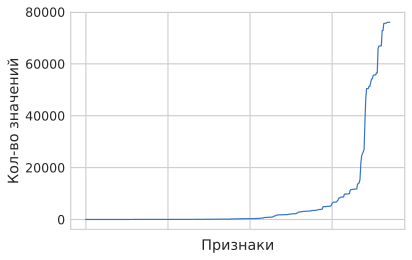

In [8]:
features=np.sum(train!=0,axis=0).sort_values(ascending = True)
features.plot()
plt.xlabel('Признаки')
plt.ylabel('Кол-во значений')

Немного жуткая ситуация, огромное кол-во признаков имеет нулевые значения, фактически данные отсутствуют. Как итог не так много фичей релевантны для работы.

In [9]:
#посмотрим есть в нашем тренировочном наборе данных пропуски (видимо нет)
#train.isnull().sum(axis = 0).sort_values(ascending = False).head()

In [9]:
#посмотрим сколько нулевых признаков/признаков, в которых везде нули
remove = []
for col in train.columns:
    if train[col].std() == 0:
        remove.append(col)
print("Кол-во нулевых признаков: ",len(remove))

Кол-во нулевых признаков:  34


In [10]:
#проверим так ли это
#for i in remove:
    #print(i, len(train[train[i]==0]))

Прекрасно, 34 признака мы смело можем дропнуть (сделаем это чуть-чуть попозже)

Копнем глубже и посмотрим на кол-во признаков, где больше 50% данных не равны 0, а также у скольких признаков нулевые данные составляют больше 50 и 90%

In [10]:
above_50 = []
below_50 = []
for i in train.columns:
    non_null = len(train[train[i]!=0])/len(train)
    if non_null > 0.5:
        above_50.append(i)
    else:
        below_50.append(i)
below_50.remove('TARGET')

In [11]:
print('Признаков в которых не нулевых значений больше 50%: {}'.format(len(above_50)))
print('Признаков в которых не нулевых значений меньше 50%: {}'.format(len(below_50)))

Признаков в которых не нулевых значений больше 50%: 30
Признаков в которых не нулевых значений меньше 50%: 340


Отлично, теперь мы знаем что у нас есть всего 30 признаков у которых больше 50% значений не нулевые, соответственно опираясь на это мы будем выбирать стратегию заполнения нулевых значений и уже сейчас можно сделать предположение что для данного набора данных целесообразно применить стратегию undersampling для мажоритарного класса признака TARGET

In [12]:
#дропним 340 признак и посмотрим что будет
train_m.drop(below_50, axis=1, inplace=True)

#### Теперь будем работать с новым набором данных, посмотрим на распределение значений

In [13]:
#посмотрим на наличие пропусков данных
train_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 31 columns):
ID                          76020 non-null int64
var3                        76020 non-null int64
var15                       76020 non-null int64
ind_var5_0                  76020 non-null int64
ind_var5                    76020 non-null int64
ind_var30_0                 76020 non-null int64
ind_var30                   76020 non-null int64
ind_var39_0                 76020 non-null int64
ind_var41_0                 76020 non-null int64
num_var4                    76020 non-null int64
num_var5_0                  76020 non-null int64
num_var5                    76020 non-null int64
num_var30_0                 76020 non-null int64
num_var30                   76020 non-null int64
num_var35                   76020 non-null int64
num_var39_0                 76020 non-null int64
num_var41_0                 76020 non-null int64
num_var42_0                 76020 non-null int64
num_var42

Итак, я нашел информацию о некоторых признаках:
- num_var4 - это кол-во банковских продуктов у клиента
- var15 - это возраст клиента
- var38 - загадка что это, но в интернете пишут что это важный признак

Посмотрим на распределение возраста клиента и кол-ва банковских продуктов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44e8a1e470>,
      dtype=object)

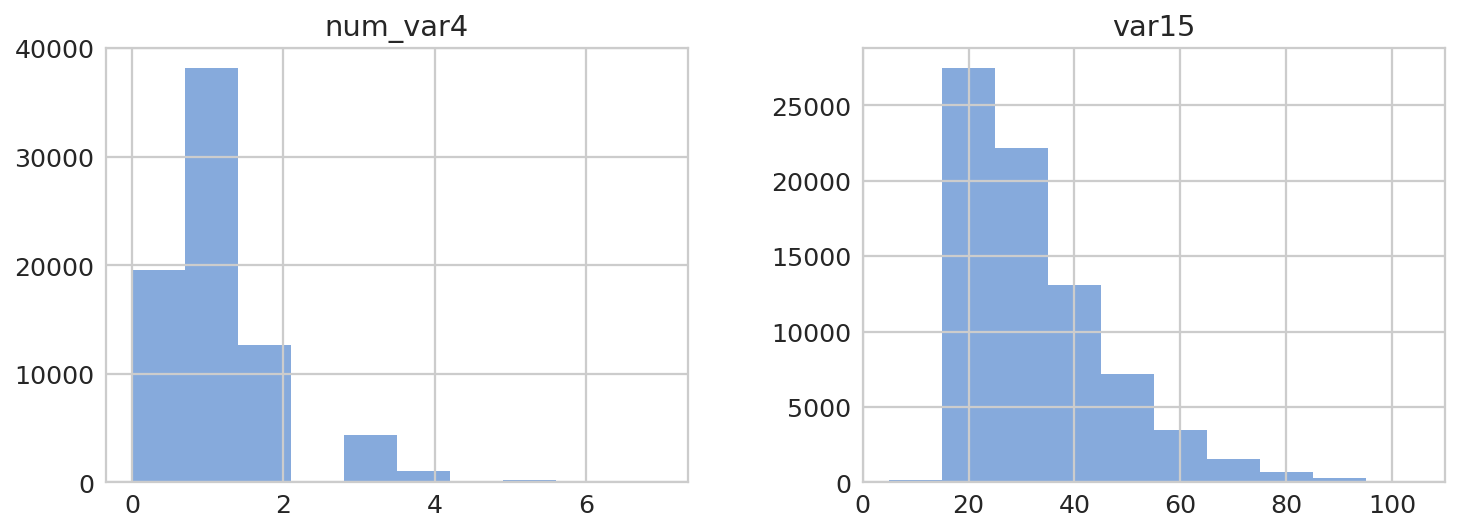

In [14]:
%config InlineBackend.figure_format = 'retina'
train_m[['var15', 'num_var4']].hist(bins=10, alpha=0.6, figsize=(12,4), )

Посмотрим на распределение возраста и удовлетворенности клиентов

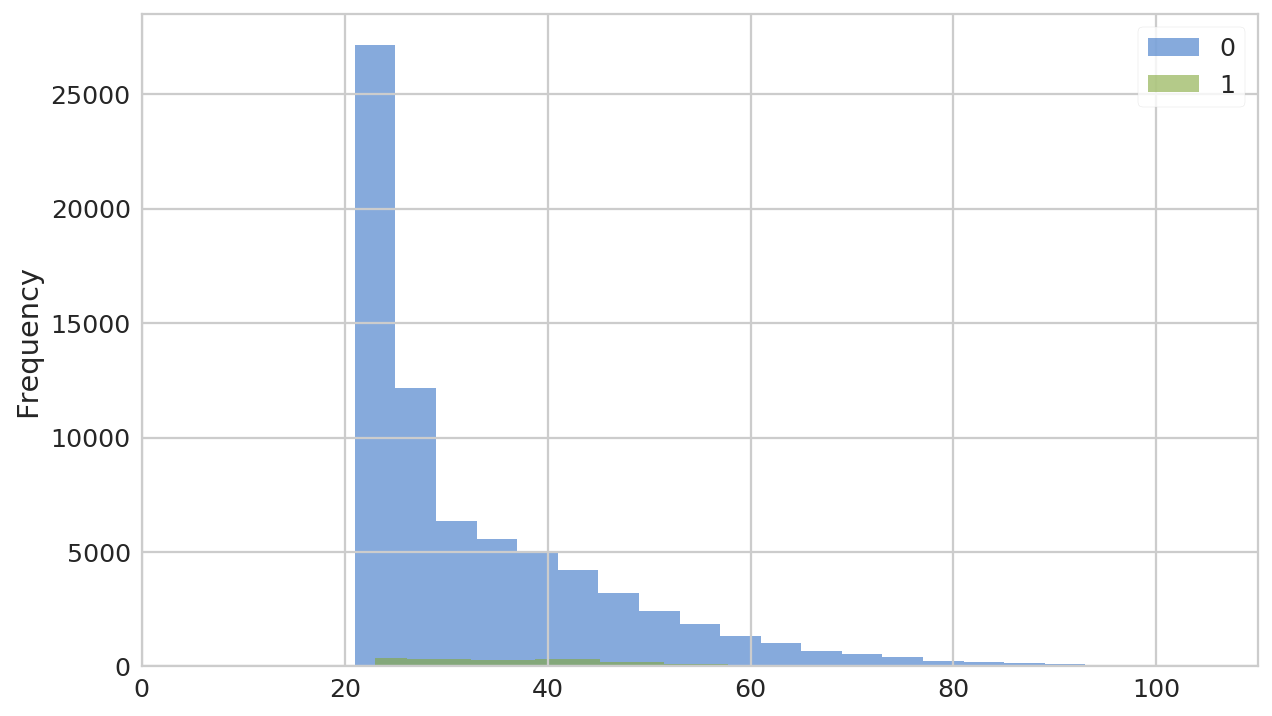

In [15]:
train_m.groupby('TARGET')['var15'].plot.hist(figsize=(10,6), alpha=0.6, bins=25) #сделаем трюк для наглядности
plt.legend();

Из данного распрделения можно сделать вывод что основная часть недовольных клиентов приходиться на возрастной период с 20 с небольшим лет до 50 лет

Посмотрим на распределение кол-ва банковских продуктов и удовлетворенности клиентов

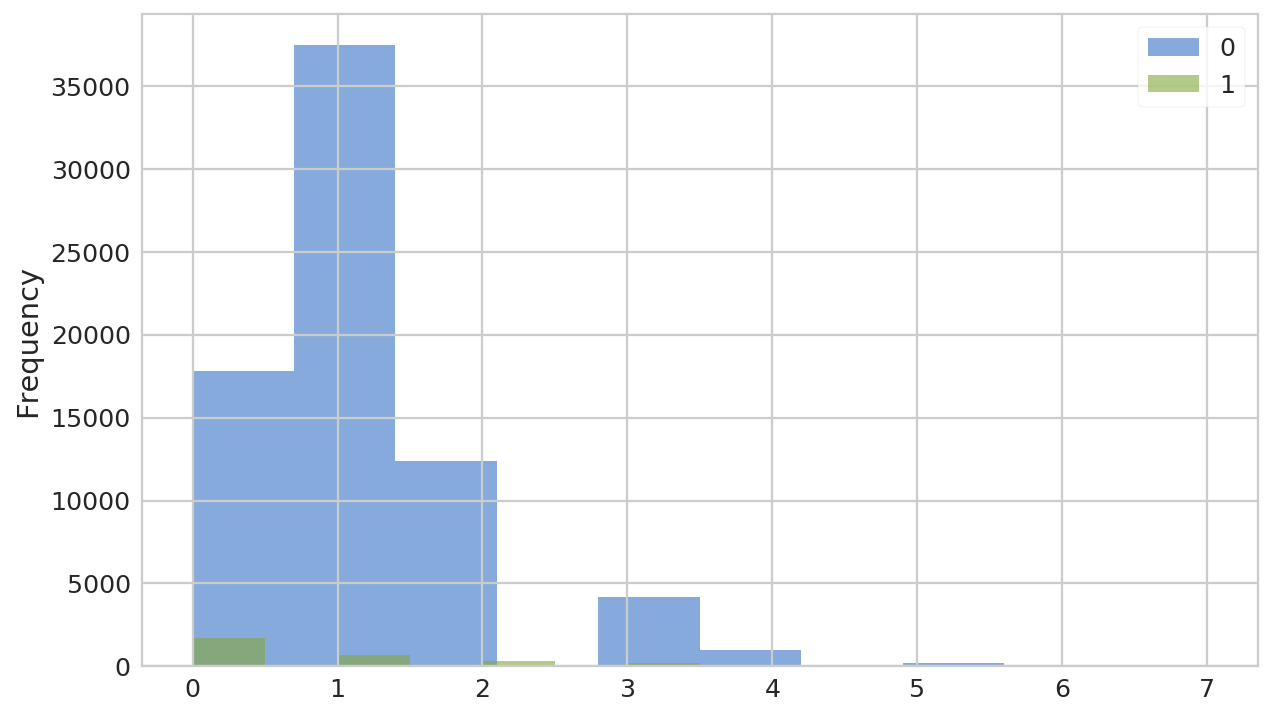

In [16]:
train_m.groupby('TARGET')['num_var4'].plot.hist(figsize=(10,6), alpha=0.6, bins=10) #сделаем трюк для наглядности
plt.legend();

Странная ситуация, почему-то люди которые вообще не пользуются банковскими продуктами  недовольны чаще чем клиенты у которых есть один и более банковских продуктов. Ну это как минимум интересно и главное мы можем сделать новый бинарный признак «ноль или не ноль банковских продуктов».

Для лучшего понимания представленного выше распределения немного поменяем формат визуального представления и сделаем некое пересечение возраста и кол-ва продуктов к удовлетворенности/неудовлетворенности клиентов.

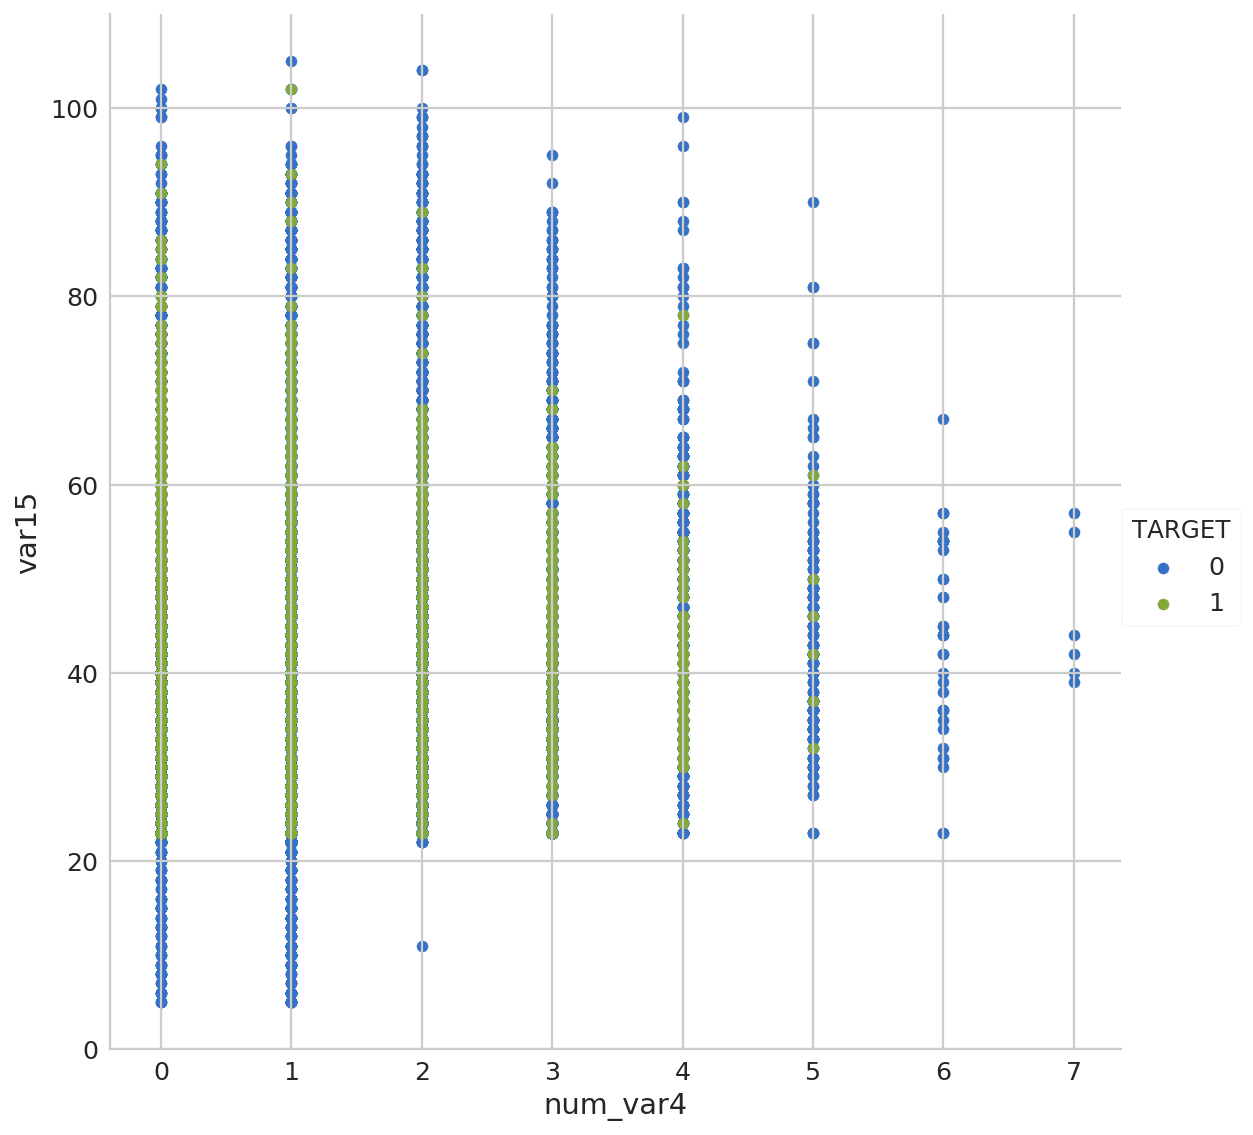

In [17]:
sns.FacetGrid(train, hue='TARGET', size=8) \
   .map(plt.scatter, 'num_var4', 'var15') \
   .add_legend();

Повторюсь несмотря на магию в части нулевого кол-ва продуктов, вырисовывается очень интересная картина:
- если у вас 0 продуктов то можно сделать вывод что подавляющее кол-во недовольных клиентов будет в возрастной группе от 20 до 80 лет (видимо выборка из клиентов жителей стран с высокой продолжительностью жизни)
- похожая картина наблюдается у группы с одним и двумя продуктами

Важно отметить что я не понимаю как клиенты у которых нет никаких банковских продуктов могут быть недовольны, варианта только два: либо они недовольны тем что у них нет банковских продуктов, либо это значение может означать что эти клиенты уже не клиенты банка, но это все на уровне гипотез 

Посмотрим на распределение кол-во клиентов для каждого кол-ва продуктов

In [18]:
train_m['num_var4'].value_counts()

1    38147
0    19528
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64

Все интересней и интересней, из 76к семплов в нашем наборе данных порядка 26% приходятся на пользователей 0 банковских продуктов, копнем еще глубже и посмотрим на соотношение значения таргета по группам кол-ва банковских продуктов

In [19]:
train_m.groupby('num_var4')['TARGET'].value_counts(normalize=True)

num_var4  TARGET
0         0         0.911051
          1         0.088949
1         0         0.981860
          1         0.018140
2         0         0.973763
          1         0.026237
3         0         0.958419
          1         0.041581
4         0         0.943744
          1         0.056256
5         0         0.970443
          1         0.029557
6         0         1.000000
7         0         1.000000
Name: TARGET, dtype: float64

кажется я нашел что-то интересное (подтвердил ранее выдвинутую гипотезу), у клиентов с 0 банковских продуктов самое большое кол-во недовольных

#### Провести анализ корреляции переменных, отобразить взаимосвязи между переменными

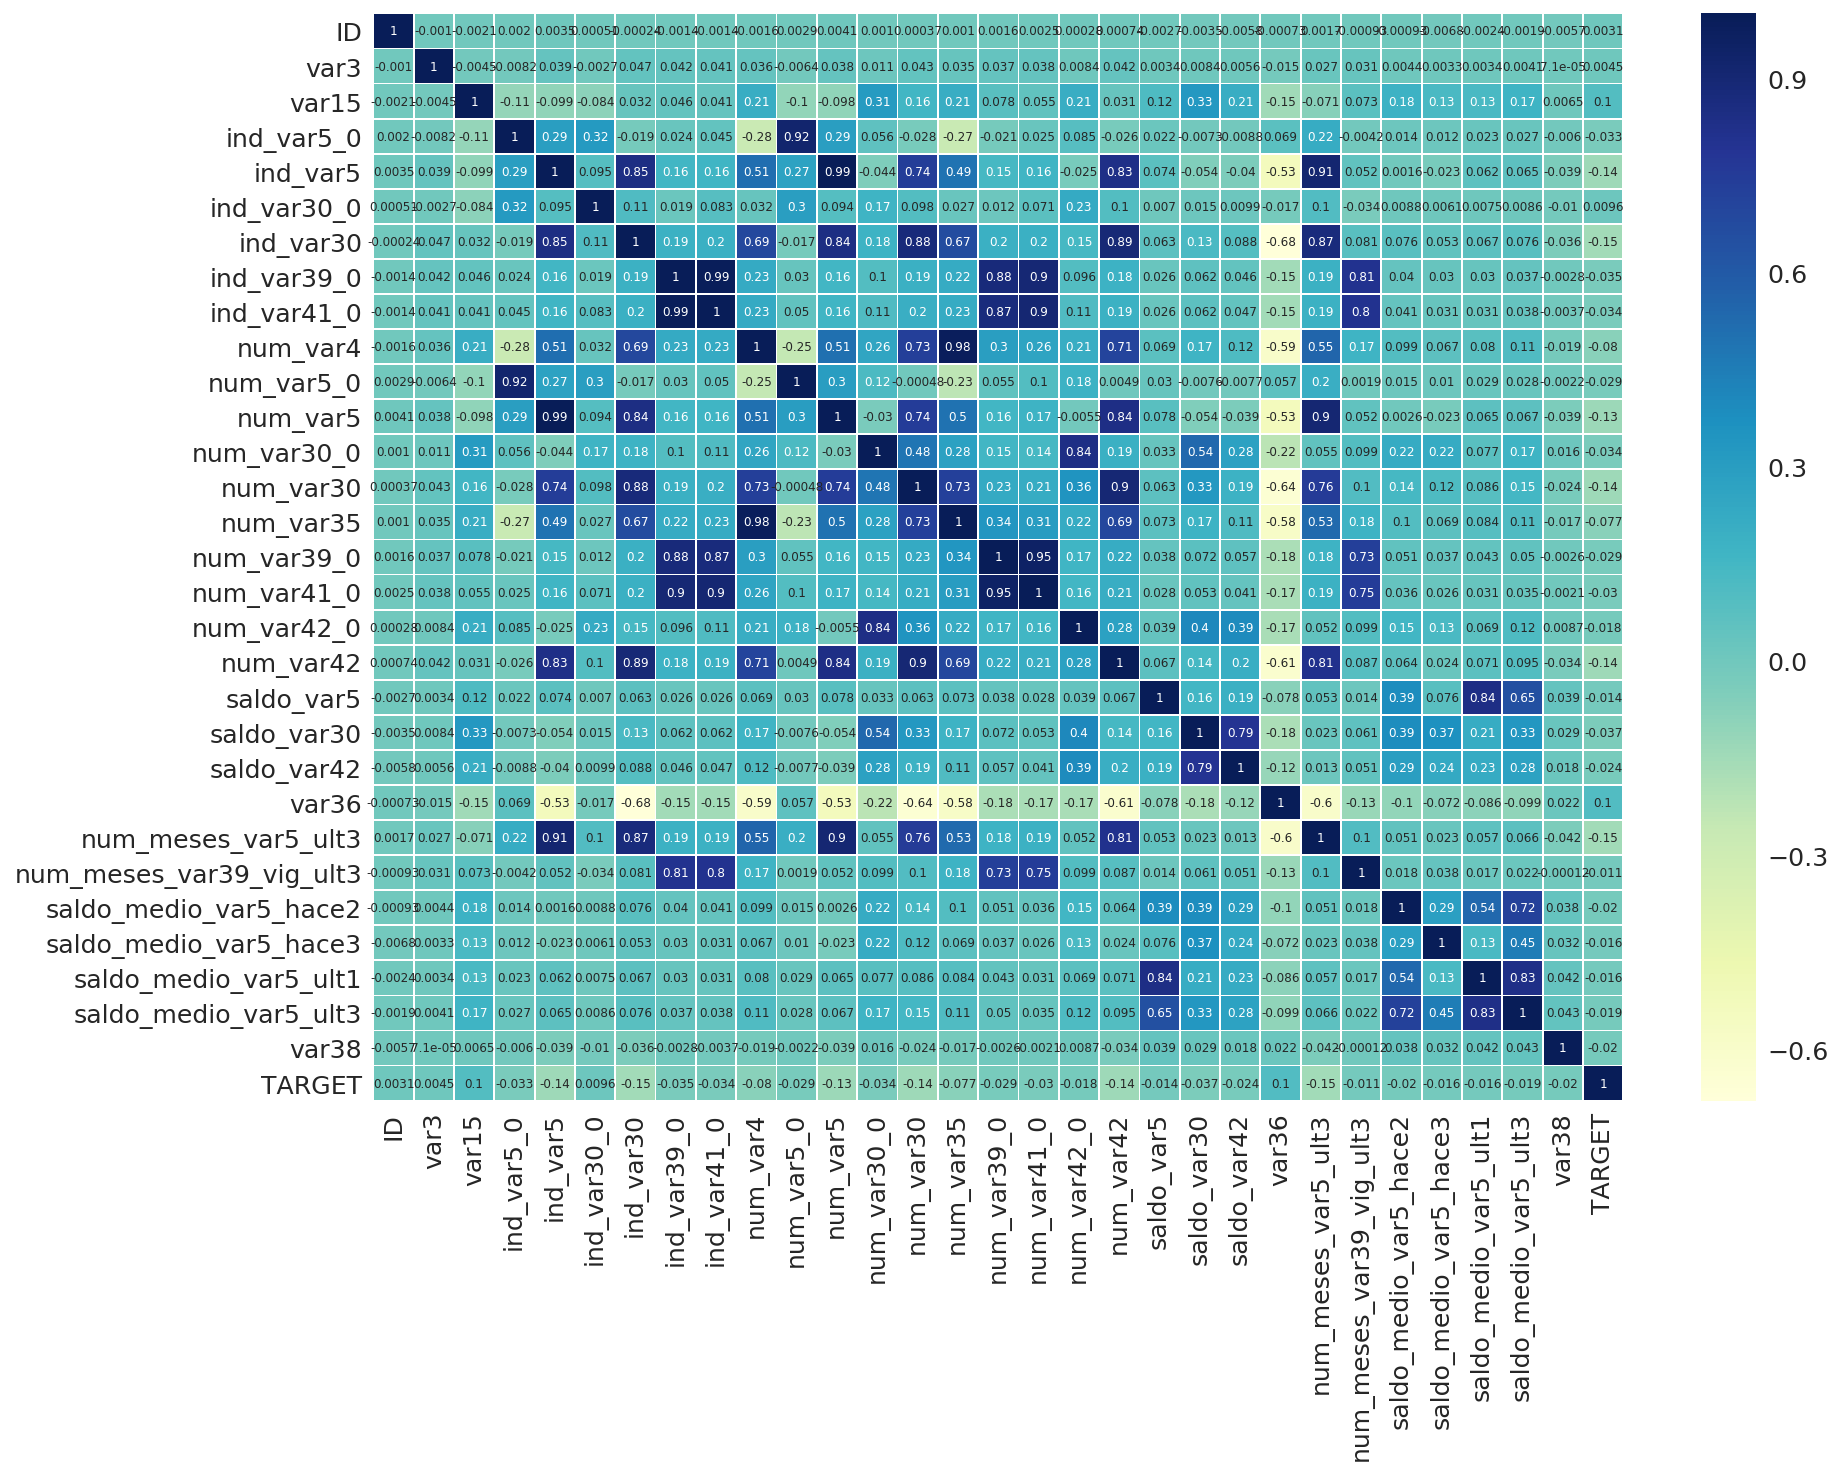

In [20]:
%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots()
#protect our eyes возьмем размер побольше
fig.set_size_inches(14, 10)
corr = train_m.corr()
sns.heatmap(corr, annot=True, linewidths=.4,cmap="YlGnBu", linecolor='white', annot_kws={"size": 6},\
            xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Из интересного из того что мы можем наблюдать можно отметить то, что признак var36 в разной степени обратно коррелирует с большинством признаков, а признак ind_var5 очень серьезно зависит от признака num_var5, на самом деле что интересно так это то что признака типа ind_var и num_var с одинаковым числом имеют высокую корреляцию, интересный факт

#### Хорошо, время пришло для того чтобы выполнить Feature Selection 
(выше я уже частично выполнил это задание), для решения данного задания я применил следующие стратегии:
- сокращение размерности пространства признаков (удалил признаки с пропущенными значениями или нулевыми)
- сокращение размерности PCA

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Подготовим два набора данных для сравнения стратегий, уберем целевую переменную и выполним нормализацию данных

- X и y сформированы из уже обработанных выше данных (размерность матрицы объект признак 76020 на 30)

In [22]:
#X = train_m.iloc[:,:-1]
#y = train_m.TARGET

In [23]:
#features_pca возвращает нам название признаков
features = [x for x in train_m.columns]
#уберем признак target
features.remove('TARGET')

In [24]:
X = train_m.loc[:, features].values
y = train_m.loc[:,['TARGET']].values

In [25]:
X.shape, y.shape

((76020, 30), (76020, 1))

- X_pca и y_pca выполним сокращение размерности пространства признаков с помощью метода PCA

In [26]:
#features_pca возвращает нам название признаков
features_pca = [x for x in train.columns]
#уберем признак target
features_pca.remove('TARGET')

In [27]:
#сделаем набор данных
X_pca = train.loc[:, features_pca].values
y_pca = train.loc[:,['TARGET']].values

In [28]:
X_pca.shape, y_pca.shape

((76020, 370), (76020, 1))

##### Выполним сокращение пространства признаков с помощью метода PCA

In [29]:
#стандартизируем наши данные
X_pca = StandardScaler().fit_transform(X_pca)

In [30]:
#выберем минимальное кол-во компонентов при этом сохраним 95% дисперсии нашего распределения
pca = PCA(.95)

In [31]:
#зафитим наши данные
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
X_pca_t = pca.transform(X_pca)

In [33]:
#у нас 101 компонента (компонента - не признак)
X_pca_t.shape

(76020, 101)

#### Эксперимент 0

Теперь проведем эксперимент на каком наборе данных мы получим лучше точность, будем использовать логистическую регрессию

- возьмем набор данных X и y

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [35]:
#разобьем набор данных X и y на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
logReg = LogisticRegression(solver='newton-cg')

In [37]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#получим результат на train
y_pred = logReg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logReg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.959898


In [39]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     51120
          1       0.02      0.00      0.00      2094

avg / total       0.92      0.96      0.94     53214



- возьмем набор данных X_pca_t и y_pca

In [40]:
#разобьем набор данных X и y на трейн и тест

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca_t, y_pca, test_size=0.3, random_state=0)

In [41]:
logReg_p = LogisticRegression(solver='newton-cg')

In [42]:
logReg_p.fit(X_train_p, y_train_p)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
#получим результат на train
y_pred_p = logReg_p.predict(X_train_p)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logReg_p.score(X_train_p, y_train_p)))

Accuracy of logistic regression classifier on test set: 0.960405


In [44]:
print(classification_report(y_train_p, y_pred_p))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     51120
          1       0.32      0.01      0.01      2094

avg / total       0.94      0.96      0.94     53214



#### Вывод из эксперимента 0:

выполнив предсказание на двух разных наборах данных (один с 30 признаками, второй с 101 признаком) я получил очень близкие данные на train, и там и там порядка 96% точности, но если смотреть 6 знаков после запятой то видно, что результат при 101 признаке на 3 десятитысячных точнее, кроме того на втором наборе данных значение precision повыше, значит вторая моделька на данных которые относит к определенному классу более точно классифицирует, чем та которая на 30 признаках работает, я думаю что для банка при исследование удовлетворенности клиентов значение precision очень важно

#### Выполним шкалирование данных несколькими способами (нормализация, стандартизация) и оценим какой подход лучше?

посколько принципиальной разницы в точности на наборах данных с 30 и 101 признаком мы пока не получили, для быстроты обработки данных я буду работать с набором данных в котором 30 признаков (набор данных X)
*стандартизацию данных мы уже делали когда сравнивали два подхода feature selection

Алгоритм:
- выполним нормализацию/стандартизацию
- разобьем набор данных на train и test
- зафитим модель LogisticRegression
- оценем качество 

#### Эксперимент 1

In [45]:
from sklearn import preprocessing

In [46]:
# выполним нормализацию данных
normalized_X = preprocessing.normalize(X)
# выполним стандартизацию данных
standardized_X = preprocessing.scale(X)

In [47]:
normalized_X.shape, standardized_X.shape, y.shape

((76020, 30), (76020, 30), (76020, 1))

In [48]:
#разабьем набор данных на трейн и тест

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(normalized_X, y, test_size=0.3, random_state=0)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(standardized_X, y, test_size=0.3, random_state=0)

In [49]:
logReg_n = LogisticRegression()
logReg_s = LogisticRegression()

In [50]:
logReg_n.fit(X_train_n, y_train_n)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
logReg_s.fit(X_train_s, y_train_s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
#получим результат на train
y_pred_n = logReg_n.predict(X_train_n)
y_pred_s = logReg_s.predict(X_train_s)
print('Accuracy of logistic regression classifier on train set with normalized: {:.6f}'\
                                                                    .format(logReg_n.score(X_train_n, y_train_n)))
print('Accuracy of logistic regression classifier on train set with standardized: {:.6f}'\
                                                                    .format(logReg_s.score(X_train_s, y_train_s)))

Accuracy of logistic regression classifier on train set with normalized: 0.960649
Accuracy of logistic regression classifier on train set with standardized: 0.960330


#### Вывод из эксперимента 1:

как мы видим из эксперемента, для данного набора данных принципиальной разницы между стандартизацией и нормализацией нет

#### Oversamling vs Undersamling

В наборе данных мажоритарный класс для признака TARGET это 0, соответственно мы будем работать с этим признаком.
Посколько принципиальной разницы в точности на наборах данных с 30 и 101 признаком мы пока не получили, для быстроты обработки данных я буду работать с набором данных в котором 30 признаков (набор данных train_m) 

#### Эксперимент 2

##### Выполним стратегию oversampling и сравним ее результаты с неизмененной моделью

In [53]:
X = train_m.loc[:, train_m.columns != 'TARGET']
y = train_m.loc[:, train_m.columns == 'TARGET']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TARGET'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['TARGET']==0]))
print("Number of subscription",len(os_data_y[os_data_y['TARGET']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==1])/len(os_data_X))

length of oversampled data is  102240
Number of no subscription in oversampled data 51120
Number of subscription 51120
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [54]:
os_data_X.shape, os_data_y.shape

((102240, 30), (102240, 1))

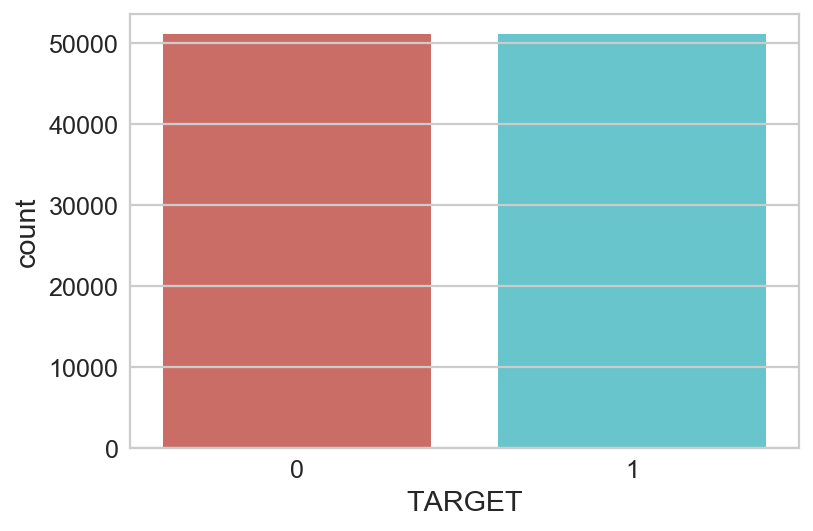

In [55]:
#построим countplot
sns.countplot(x='TARGET', data=os_data_y, palette='hls')

In [56]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

In [57]:
logReg_os = LogisticRegression()

In [58]:
logReg_os.fit(X_train_os, y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
#получим результат на train
y_pred_os = logReg_os.predict(X_train_os)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logReg_os.score(X_train_os, y_train_os)))

Accuracy of logistic regression classifier on test set: 0.697295


In [60]:
print(classification_report(y_train_os, y_pred_os))

             precision    recall  f1-score   support

          0       0.75      0.59      0.66     35921
          1       0.66      0.80      0.73     35647

avg / total       0.71      0.70      0.69     71568



##### Выполним стратегию undersampling и сравним ее результаты с неизмененной моделью

In [61]:
no_zero = len(train_m[train_m.TARGET == 1])

In [62]:
non_zero_ind = train_m[train_m.TARGET == 0].index

In [63]:
random_ind = np.random.choice(non_zero_ind, no_zero, replace=True)

In [64]:
zero_ind = train_m[train_m.TARGET == 1].index

In [65]:
under_s_ind = np.concatenate([zero_ind, random_ind])

In [66]:
under_s = train_m.loc[under_s_ind]

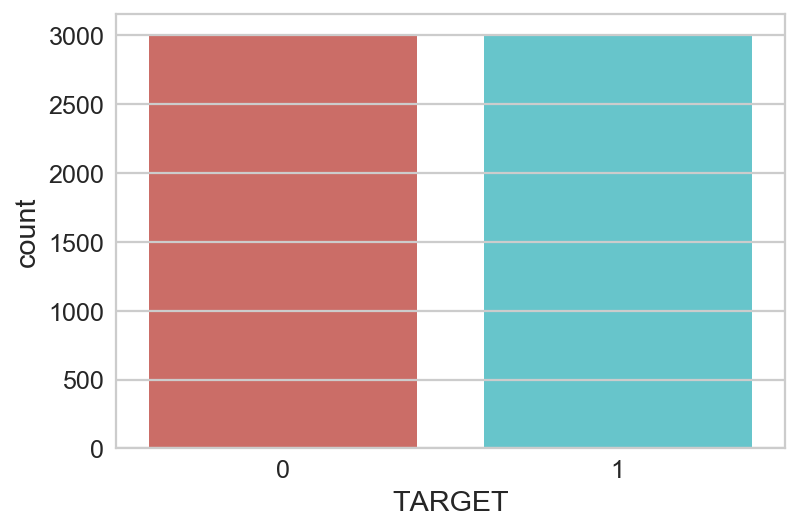

In [67]:
#построим countplot
sns.countplot(x='TARGET', data=under_s, palette='hls')

In [68]:
from sklearn.utils import shuffle
under_s = shuffle(under_s)

In [69]:
X_und = under_s.loc[:, under_s.columns != 'TARGET']
y_und = under_s.loc[:, under_s.columns == 'TARGET']

In [70]:
#X_und_N = preprocessing.normalize(X_und)

In [71]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_und, y_und, test_size=0.3, random_state=10)

In [72]:
logReg_u = LogisticRegression()

In [73]:
logReg_u.fit(X_train_u, y_train_u)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
#получим результат на train
y_pred_u = logReg_u.predict(X_train_u)
print('Accuracy of logistic regression classifier on test set: {:.6f}'\
                                          .format(logReg_u.score(X_train_u, y_train_u)))

Accuracy of logistic regression classifier on test set: 0.669437


In [75]:
print(classification_report(y_train_u, y_pred_u))

             precision    recall  f1-score   support

          0       0.71      0.57      0.63      2087
          1       0.64      0.77      0.70      2124

avg / total       0.68      0.67      0.67      4211



#### Начальный набор данных

In [76]:
X_r = train_m.loc[:, train_m.columns != 'TARGET']
y_r = train_m.loc[:, train_m.columns == 'TARGET']

In [77]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.3, random_state=10)

In [80]:
logReg_r.fit(X_train_r, y_train_r)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
#получим результат на train
y_pred_r = logReg_r.predict(X_train_r)
print('Accuracy of logistic regression classifier on test set: {:.6f}'\
                                          .format(logReg_r.score(X_train_r, y_train_r)))

Accuracy of logistic regression classifier on test set: 0.959691


#### Вывод из эксперимента 2:

как мы видим из эксперемента, для данного набора данных результаты полученные, после выполнения oversampling/undersampling не сильно отличаются друг от друга, но достаточно сильно хуже результатов полученных на необработанных данных

### Общий вывод по первой части

Для данного набора данных рассмотренные стратегии сокращения пространства признаков как и нормализация или стандартизация не существенно влияют на результаты работы модели, при этом результаты полученные в результате балансировки данных оказались ниже чем на не сбалансированных данных. На мой взгляд это вполне логично, потому, что когда я применял стратегию undersampling, 0 - значения таргета я выбирал рандомно, при этом я не контролировал какое кол-во признаков с большим кол-вом нулевых значений могло попасть в трансформированный набор данных, в следствии чего полученный результат оказался низким.

### Часть II (задания с 8 по 12)

- Сделать кросс-валидацию тренировочных данных с использованием подхода K-fold (n_folds=10)
- Решить задачу бинарной классификации и предсказать удовлетворение клиентов банка (переменная TARGE)
- Рассчитать Feature Importances для переменных модели
- Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Rec
- Построить Confusion Matrix для ваших результатов

*для выполнения данной части итогового проекта в качестве решающей модели я буду использовать решающие деревья
*для ускорения вычислений будем использовать набор данных с 30 признаками и стандартизированные

In [82]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

##### - Сделаем модель

In [83]:
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s

##### - Выполним кросс - валидацию k-folds = 10

In [84]:
scores = cross_val_score(clf_rf, X_train_s, y_train_s, cv=10, scoring='accuracy')
print(scores)

print('Среднее значение на кросс-валидации равно: {}'.format(scores.mean()))

[0.96054115 0.96054115 0.96054115 0.96054115 0.96072167 0.96072167
 0.96072167 0.96072167 0.96072167 0.96072167]
Среднее значение на кросс-валидации равно: 0.9606494612929944


*ради интереса посмотрим как деревья будут работать на наборе данных после undersampling

In [85]:
clf_rf_1 = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)

In [86]:
scores1 = cross_val_score(clf_rf_1, X_train_u, y_train_u, cv=10, scoring='accuracy')
print(scores1)

print('Среднее значение на кросс-валидации равно: {}'.format(scores1.mean()))

[0.74881517 0.72748815 0.76777251 0.74170616 0.77909739 0.75771971
 0.73871734 0.76666667 0.73571429 0.7547619 ]
Среднее значение на кросс-валидации равно: 0.751845928946941


результат немного лучше чем если использовать логистическую регрессию

##### - Рассчитаем Feature Importances для переменных модели

In [88]:
clf_rf.fit(X_train_s, y_train_s)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
imp = pd.Series(clf_rf.feature_importances_)
imp.sort_values(ascending=False)

2     0.465723
20    0.133323
29    0.096850
14    0.056158
13    0.052526
9     0.033577
6     0.028613
23    0.025916
19    0.015486
0     0.013012
25    0.011705
26    0.010260
1     0.009757
12    0.008412
28    0.006185
21    0.005946
27    0.005847
5     0.005048
10    0.004720
22    0.004491
17    0.003441
7     0.001130
24    0.001014
15    0.000585
11    0.000137
8     0.000102
18    0.000035
4     0.000000
3     0.000000
16    0.000000
dtype: float64

##### - Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Rec

In [90]:
#получим результат на train
y_pred_rf = clf_rf.predict(X_train_s)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(clf_rf.score(X_train_s, y_train_s)))

Accuracy of logistic regression classifier on test set: 0.960649


In [91]:
print(classification_report(y_train_s, y_pred_rf))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     51120
          1       0.00      0.00      0.00      2094

avg / total       0.92      0.96      0.94     53214



##### - Построим Confusion Matrix для полученных результатов

In [92]:
confusion_matrix = confusion_matrix(y_train_s, y_pred_rf)
print(confusion_matrix)

[[51120     0]
 [ 2094     0]]


### Общий вывод по второй части

Для данного набора данных которые были преобразованы (выполнено сокращения пространства признаков, стандартизация) выполнена кросс - валидация и получены высокие результаты .96 при отсутствии флуктуаций при k-folds = 10, выявлены важнейшие признаки и их всего порядка 5 - 7, рассчитаны основные метрики качества.